# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
The smartcab does not move at all during the simulation.

The smartcab receives numeric rewards for its actions in the face of certain environmental conditions such as the color of the light at the intersection it is idling at (or presumably, approaching, though that behavior is not observed), the presence or absence of oncoming traffic. It seems that when the actions are correct, the reward is positive, and when the actions are incorrect, the reward is negative. There is also a message stating that meeting a deadline is not enforced.

The smartcab is rewarded for idling at a red light. The smartcab is penalized (i.e., receives a negative reward for idling at a green light with no oncoming traffic. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

*agent.py*

In `agent.py`, there is a flag for learning (whether the agent is expected to learn). While none of the code is implemented, the TODO items state that when learning, the createQ function should add a new dictionary for unseen states to the Q-table and set the initial Q-value to 0.0. In the choose_action, when not learning, a random action is chosen. When learning, a random action is chosen with 'epsilon' (see below) probability, and the action associated with the highest Q-value state is chosen with 1-epsilon probability. In the latter case, when there are ties in highest Q-value, the action should be chosen randomly among the actions corresponding to the highest Q-value states.

In agent.py, there is a factor epsilon (ranging continuously from 0-1.0), which balances between choosing random actions for discovery and choosing the known best action. It corresponds to the probability that a random action will be chosen versus choosing what has previously been learned to be the best action.

Finally, in `agent.py` there is a factor alpha, which corresponds to the learning rate. This factor is used in the value iteration update rule to control what percentage of the new value gets added to the old value (i.e., `(1-alpha)*old + alpha*new)`).

*environment.py*

In `environment.py`, then class function that is called when an agent attempts to perform an action is `act`.

*simulator.py*

In `simulator.py`, render is the GUI render display of the simulation, while render_text is the non-GUI or text-based rendering of the simulation.

*planner.py*

In `planner.py`, next_waypoint considers the East-West direction before considering the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


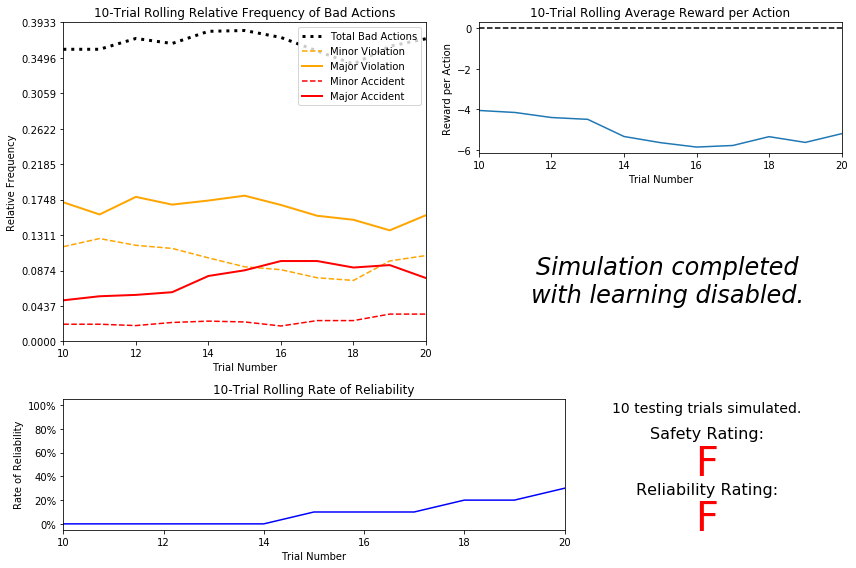

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

In the top left panel, we can see that the random driving agent makes bad decisions over 1/3 of the time, nearing 40% of the time at max. About 5-10% of overall actions result in major accidents, and around 2-4% of actions result in minor accidents, meaning that 7-14% of all actions result in accidents, or 21-42% of bad decisions result in accidents.

In the bottom left panel, the rate of reliability is zero for most of the runs and climbs to 30% by the 20th trial, meaning that the agent randomly reached the destination on 3 of the last 10 runs. This seems a little high, but it is certainly possible. In any case, we would expect a very low rate of reliability, and the reliabilty rating of F in the bottom rote panel is expected.

In the top right panel, we can see that the agent is receiving mostly negative-valued rewards. This suggests that it is being heavily penalized for certain actions (presumably the nearly 40% of bad actions, and especially those resulting in accidents).

As the number of trials increases, there is no real improvement. In many cases the results are worse (see average reward per action, percentage of bad actions, percentage of actions resulting in accidents). This is to be expected as there is no learning going on, only random behavior. Any improvement would be coincidental and the result of chance alone.

This smartcab is neither safe nor reliable. It very rarely reaches the destination, and it very often violates driving laws and causes accidents.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

For efficiency, waypoint is important. The deadline input might also be important in some cases, but in general if we are taking optimally efficient movements, it is irrelevant because we can't get there any faster. I plan to ignore it.

For safety, light and oncoming are important pieces of information. We don't want to run red lights, and we want to be careful when an oncoming car is planning to travel in a direction that could intersect our path. For example, if we try to make a left turn when the oncoming car is going straight, we could collide. Finally, after inspecting the environment.py code, I discovered that "right on red" is allowed in this environment, so we will need to make sure that there are no oncoming cars when we turn right.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

As defined in question 4, the state would have n_waypoint x n_light x n_oncoming x n_left possible values. Assuming 3 values for n_waypoint (straight, left, right), 2 values for n_light (red, green), and 4 values for n_oncoming and n_left (None, straight, left, right), there are 3x2x4x4 = 96 possible values. Each value will have one of 4 actions, giving 4x96 or 384 possible state-action pairs.

However, by noticing that the 'left' input only matters if it is 'forward' (i.e., right on red is fine in all other cases), we can reduce that state to two values, resulting in 48 possible states and 192 possible state-action pairs. 

That is probably small enough to learn a policy for each state in 20 training trials or so assuming that dozens of state-action pairs will be encountered for every trial and the occurrences of state-action pairs is distributed evenly, but it is also large enough that every state is unlikely to be encountered by random chance (i.e., some states might occur relatively frequently while others might occur rarely). Further, the amount of random choice will be decaying over the course of the trial, which will reduce the chances of seeing every state-action pair.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

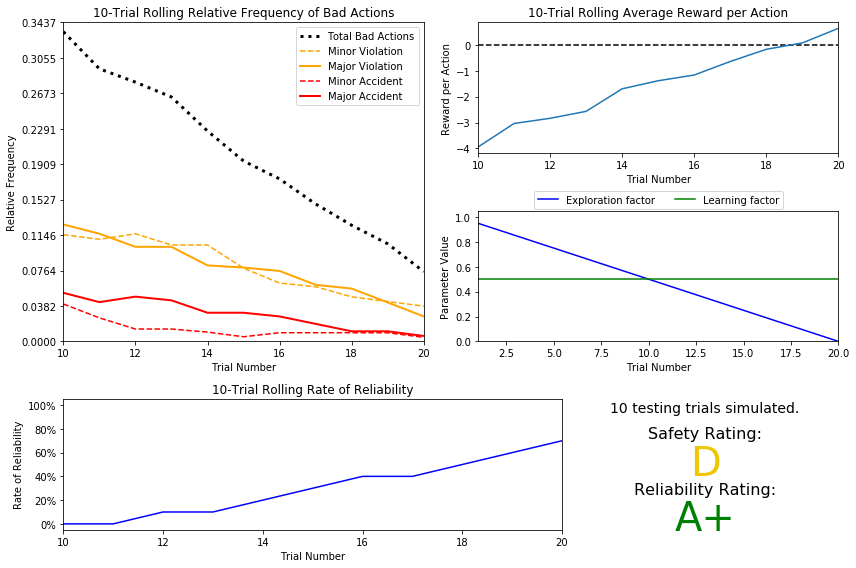

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

For the default learning simulation, we see that it starts with very similar values for the percentage of bad actions, the percentage of accidents, and the average reward per action. 

The agent required 20 training trials before testing, which makes sense given the linear decay from epsilon = 1.0 to 0.05. 

The decaying function is displayed graphically in the middle right panel. You can see that it decays linearly with the trial number.

While the default agent started with similar performance to the random agent, we can see that the default agent improved quite a bit over the random agent. For example, the percentage of bad actions dropped from around 33% to around 7-8% after training for 20 trials. The average reward per action increased from around -4 to a positive value (slightly less than 1.0). The rolling rate of reliability was near 70% and looks like it may have neared 100% given a few testing trials.

All this is reflected in the safety and reliability rating. The safety rating was still sadly low at a D, but improved over the F earned by the random agent. However, the efficiency rating was a best possible A+. This suggests that we need to work on making the agent safer at the possible cost of reduced efficiency.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

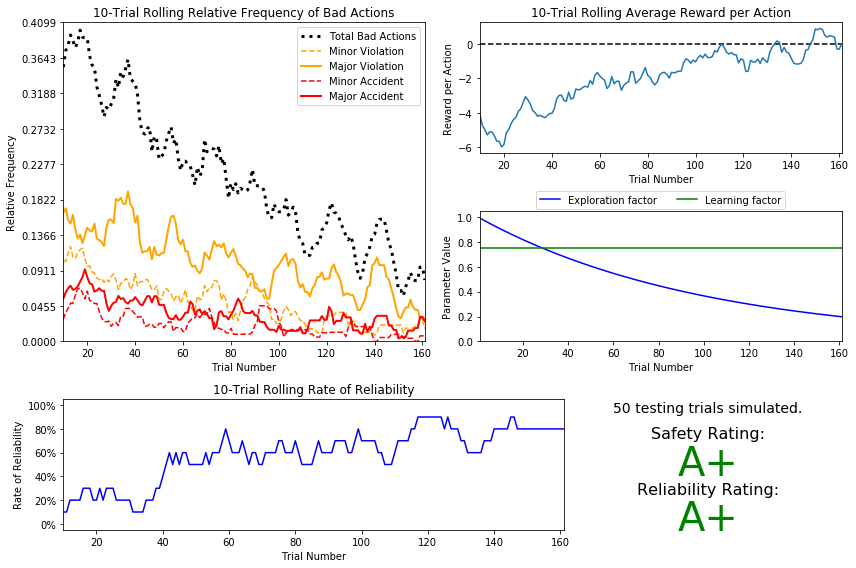

In [36]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The plots above show the final Q learner that I settled on. I used a decaying function of

$$ \epsilon = a^t, \textrm{for } a = 0.99 $$

and this resulted in 161 trials prior to testing. Testing stopped when the epsilon tolerance reached 0.20, and I used an $$\alpha = 0.75$$ for the learning rate. I selected these values because the value in the training seems to be almost entirely in exhaustively observing the set of state-action combinations, so values of epsilon as low as 0.05 aren't very useful in that they mostly result in state-action combinations with positive Q values, i.e., ones that have been seen before. I increased $$\alpha$$ because there is a fairly good distinction between a good action and a bad one (good actions seem to have Q values around 1 or 2 while bad actions vary from -5 to -40 depending on whether they result in violations or accidents). The state-action combinations don't really seem to depend much on what happens in the future. Mostly, one would like to follow the waypoint direction so long as it doesn't cause an accident or a violation. This indicated to me that once a state-action combination was observed, convergence could happen relatively fast.

Because of the high epsilon tolerance and slow decay rate, it is difficult to directly compare this agent with the default agent, which rapidly decayed to low epsilon values and started testing after 20 training trials. However, if we keep in mind that the random agent had roughly 35% bad actions and that 20% of the actions were random by the end of training, we can see that the improved agent, by reducing bad actions to less than 9% by the end of training, was nearly perfect by the end of training. The default learner reduced its bad actions to around the same mark, but only 5% of its moves were random, meaning that nearly half of its incorrect moves were due to learned policies.

Finally, the result of A+ for safety and A+ for reliability indicate that this learner is superior to the default learner. This is mostly because of the number of trials and the increased incidence of random moves. Also note that I tested this learner over 50 trials (as opposed to 10 for the default learner) so that testing would have more opportunities to root out faulty state-action combinations. It is possible that the default learner would have earned an F in safety but never had the opportunity to activate the state-action pair that would result in a major accident.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

Note that in the following examples, the state tuple represents, (waypoint, light, oncoming, left == straight). So if the waypoint is 'straight', the light is 'red', the oncoming car is None, and the car on the left is 'straight', the tuple would read ('straight', 'red', None, True)

A simply described optimally safe policy would be to follow the waypoint whenever it will result in neither an accident nor a violation, and to idle otherwise. Here are some rules describing the policy in order of priority:

1. light is red, waypoint is left or straight, any values for oncoming and left (16 states): action should be None because actions straight and left are violations. While right may be permissible, it doesn't immediately bring us closer to the goal.
2. light is red, waypoint is right, any value for oncoming, car on left is not going forward (4 states): action should be right because it is permitted, safe, and advances towards the goal.
3. light is red, waypoint is right, any value for oncoming, left is forward (4 states): action should be None because straight and left are violations and right will result in an accident.
4. light is green, waypoint is right, any value for oncoming, any value for left (8 states): action is right because it is permitted, safe, and advances towards the goal.
5. light is green, waypoint is straight, any value for oncoming, any value for left (8 states): action is straight because it is permitted, safe, and advances towards the goal.
6. light is green, waypoint is left, oncoming is None or left, any value for left (4 states): action is left because it is permitted, safe, and advances towards the goal.
6. light is green, waypoint is left, oncoming is straight or right, any value of left (4 states): in real life, the action here is almost always None (wait for oncoming lane to clear), but the environment counts an idle at a green light as a minor violation. In this case, the environment will reward straight or right (or penalize them less), and our agent will not be able to compensate -- even though such actions may move us further away from our goal -- because our agent has no sense of future states.


There are many cases where the optimal action is not occurring
For these states (case 6 above):
('left', 'green', 'right', True)
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.92
 -- left : -14.44

('left', 'green', 'right', False)
 -- forward : -0.21
 -- None : -5.40
 -- right : 0.90
 -- left : -18.48

('left', 'green', 'forward', True)
 -- forward : -0.36
 -- None : 0.00
 -- right : 0.58
 -- left : -15.28

('left', 'green', 'forward', False)
 -- forward : 1.81
 -- None : -5.19
 -- right : -0.00
 -- left : -20.11

we find that the agent will choose actions (right in the first three cases, forward in the last) even though they are not in the direction of the waypoint. It is hard to say if this is non-optimal because many of us have had the experience of altering the direct route by making three right turns to avoid making an unprotected left at a busy intersection.

For this case:
('right', 'red', 'right', True)
 -- forward : -29.44
 -- None : 0.00
 -- right : 0.00
 -- left : -38.03

we see that the agent will take a right turn 50% of the time, but the last state indicates that it will cause a minor accident since there is a car on the left going forward. Clearly this state with the action 'right' did not occur in testing, or the safety rating could not have been A+.

For these cases:
('right', 'green', 'left', True)
 -- forward : 0.36
 -- None : 0.00
 -- right : 0.89
 -- left : 1.44

('right', 'green', 'forward', True)
 -- forward : 0.41
 -- None : -4.54
 -- right : 0.00
 -- left : -18.76

we see the agent going forward and left, even though the waypoint is right and that action is permissable and safe. This must be some peculiarity of the course in which the state-action pairs were trained. Note that the None action must not have been observed in training as it should have incurred a minor violation cost (-5).

For this case:
('left', 'red', 'right', True)
 -- forward : 0.00
 -- None : 0.00
 -- right : -14.47
 -- left : -36.82

we see the agent choosing randomly between None and forward. Clearly this state wasn't paired with the forward action in training because the car on the left was going forward, and this should have resulted in a major accident. Likewise, it wasn't seen in testing either, or the A+ rating would not resulted.

However, for most of the 48 states, the optimal action was determined. For example:

('left', 'red', 'left', False)
 -- forward : -11.97
 -- None : 1.11
 -- right : 0.35
 -- left : -9.81

('right', 'green', 'left', False)
 -- forward : 0.83
 -- None : -5.43
 -- right : 2.01
 -- left : 0.01

('forward', 'green', None, False)
 -- forward : 1.14
 -- None : -4.90
 -- right : 0.73
 -- left : 0.97

For each of the above states, the optimal action has the highest Q value.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.